In [1]:
import matplotlib.pyplot as plt
import altair as alt

import pandas as pd
import numpy as np
import os

from mne.time_frequency import read_tfrs

from data_utils import diff_specs

In [2]:
sp = '/home/zsteineh/CSE481_spectrogram_example/'
data_lp = '/data1/users/stepeter/htnet_generalized_data/eeg_dataset/'

In [3]:
diff_specs(sp, data_lp)

  0%|          | 0/15 [00:00<?, ?it/s]

Determining ROIs
ROIs found


100%|██████████| 15/15 [00:01<00:00,  9.51it/s]
0it [00:00, ?it/s]

Data loaded!
Not setting metadata
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Computing power...
Not setting metadata
Power computation complete!
Computing power...
Not setting metadata


1it [00:06,  6.76s/it]

Power computation complete!
Not setting metadata
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Computing power...
Not setting metadata
Power computation complete!
Computing power...
Not setting metadata


2it [00:13,  6.79s/it]

Power computation complete!
Not setting metadata
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Computing power...
Not setting metadata
Power computation complete!
Computing power...
Not setting metadata


3it [00:20,  6.64s/it]

Power computation complete!
Not setting metadata
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Computing power...
Not setting metadata
Power computation complete!
Computing power...
Not setting metadata


4it [00:26,  6.59s/it]

Power computation complete!
Not setting metadata
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Computing power...
Not setting metadata
Power computation complete!
Computing power...
Not setting metadata


5it [00:33,  6.60s/it]

Power computation complete!
Not setting metadata
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Computing power...
Not setting metadata
Power computation complete!
Computing power...
Not setting metadata


6it [00:39,  6.57s/it]

Power computation complete!
Not setting metadata
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Computing power...
Not setting metadata
Power computation complete!
Computing power...
Not setting metadata


7it [00:46,  6.57s/it]

Power computation complete!
Not setting metadata
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Computing power...
Not setting metadata
Power computation complete!
Computing power...
Not setting metadata


8it [00:52,  6.55s/it]

Power computation complete!
Not setting metadata
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Computing power...
Not setting metadata
Power computation complete!
Computing power...
Not setting metadata


9it [00:59,  6.56s/it]

Power computation complete!
Not setting metadata
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Computing power...
Not setting metadata
Power computation complete!
Computing power...
Not setting metadata


10it [01:05,  6.49s/it]

Power computation complete!
Not setting metadata
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Computing power...
Not setting metadata
Power computation complete!
Computing power...
Not setting metadata


11it [01:12,  6.45s/it]

Power computation complete!
Not setting metadata
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Computing power...
Not setting metadata
Power computation complete!
Computing power...
Not setting metadata


12it [01:18,  6.49s/it]

Power computation complete!
Not setting metadata
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Computing power...
Not setting metadata
Power computation complete!
Computing power...
Not setting metadata


13it [01:25,  6.56s/it]

Power computation complete!
Not setting metadata
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Computing power...
Not setting metadata
Power computation complete!
Computing power...
Not setting metadata


14it [01:31,  6.53s/it]

Power computation complete!
Not setting metadata
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Computing power...
Not setting metadata
Power computation complete!
Computing power...
Not setting metadata


15it [01:38,  6.54s/it]

Power computation complete!


<AverageTFR | time : [-1.100000, 1.100000], freq : [1.000000, 121.000000], nave : 60, channels : 1, ~9 kB>

In [4]:
savename = 'diff_spec_eeg_tfr.h5'
if os.path.isfile(sp+'sbj_avg_'+savename):
    power = read_tfrs(sp+'sbj_avg_'+savename)
    power = power[0]

Reading /home/zsteineh/CSE481_spectrogram_example/sbj_avg_diff_spec_eeg_tfr.h5 ...


In [5]:
sbj_power = []
for t,time_bin in enumerate(power.times):
    for f,fre in enumerate(power.freqs):
        cur_pow = power.data[0,f,t]
        row = ['move_rest', time_bin, fre, cur_pow]
        sbj_power.append(row)
            
avg_sbj_power_df = pd.DataFrame.from_records(sbj_power, columns = ['Data Type', 'Time', 'Freq', 'Power'])
print(avg_sbj_power_df)

     Data Type  Time   Freq     Power
0    move_rest  -1.1    1.0 -1.361398
1    move_rest  -1.1    6.0 -1.472925
2    move_rest  -1.1   11.0 -1.098310
3    move_rest  -1.1   16.0 -0.614047
4    move_rest  -1.1   21.0  0.425325
..         ...   ...    ...       ...
295  move_rest   1.1  101.0  0.030621
296  move_rest   1.1  106.0 -0.079174
297  move_rest   1.1  111.0  0.064427
298  move_rest   1.1  116.0  0.199660
299  move_rest   1.1  121.0  0.422069

[300 rows x 4 columns]


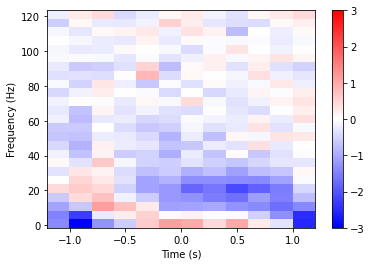

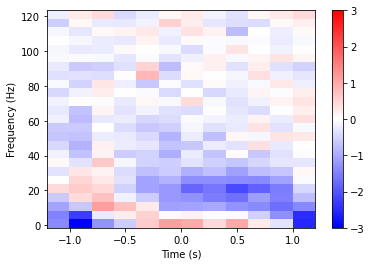

In [6]:
freq_lims = [power.freqs[0],125]
epoch_times=[-2.5,2.5]
vscale_val=3
vscale_val_min = -vscale_val
cmap='bwr'

power.plot(baseline=None, colorbar=True, title="", 
                      yscale='linear', tmin=epoch_times[0], tmax=epoch_times[1],
                      vmin=vscale_val_min,vmax=vscale_val,cmap=cmap,verbose=False,show=False)

In [7]:
zero_x = [0 for i in range(7)]
zero_y = list(range(0,121,20))
zero_df = pd.DataFrame(list(zip(zero_x, zero_y)), columns=['x', 'Freq'] )
zero_line = alt.Chart(zero_df).mark_line(color='black', strokeDash=[10,10]).encode(
    alt.X('x', axis = alt.Axis(labels=False) , title ='movement initation'),
    alt.Y('Freq', title='Frequency (Hz)', axis = alt.Axis(tickCount = 6, orient='left'))
).properties(height=350,width=400)

spec = alt.Chart(avg_sbj_power_df).mark_rect().encode(
    alt.X('Time:O', title ='Time (s)'),
    alt.Y('Freq:O', 
          sort = 'descending', 
          title = '',
          axis = None
         ),
    alt.Color('Power:Q', 
              sort = 'descending', 
              scale = alt.Scale(scheme='redblue', domain=(-3,3) ))
).properties(height=350,width=400, title=['Spectrogram of Brain Activity During Movement', 'Averaged Across Participants'])

spec + zero_line

alt.LayerChart(...)